<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Sismos_probabilisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sismos7 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwIELBKwwZD91Ib1_96POm_i8kG9uJhpEoXAfHzZWy4PifaD_0nJv4tMxcARMSqA/pub?output=csv')
print(sismos7)
#mes/dia/año

    Magnitud   Fecha UTC  Hora UTC
0        7.4   1/19/1900   6:33:30
1        7.5   4/19/1902   2:23:00
2        7.7   9/23/1902  20:18:00
3        7.1  12/12/1902  23:10:00
4        7.6   1/14/1903   1:47:36
..       ...         ...       ...
63       7.1   9/19/2017  18:14:39
64       7.2   2/16/2018  23:39:39
65       7.4   6/23/2020  15:29:03
66       7.1    9/8/2021   1:47:46
67       7.7   9/19/2022  18:05:09

[68 rows x 3 columns]


In [ ]:
sismos6 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT6LM8x3cEPQtlmcZJy2IVtVgF_OqUqwM3sPkbXyqJAXvwhQYY8SacyCNAiAXs0yh0RmfBnmVjrd8R-/pub?output=csv')
sismos6
#mes/dia/año

,Magnitud_6,Fecha UTC_6,Hora UTC_6
0,7.4,01/20/1900,6:33:30
1,6.9,05/16/1900,20:12:00
2,6.9,03/05/1901,10:45:00
3,7.0,12/09/1901,2:17:00
4,7.0,01/16/1902,23:19:00
...,...,...,...
280,6.3,11/04/2022,10:02:48
281,6.2,11/22/2022,16:39:05
282,6.4,06/18/2023,20:30:22
283,6.5,07/14/2023,9:29:01


In [ ]:
#organiza valores para sismos > 7
sismos7['fecha_hora'] = pd.to_datetime(sismos7['Fecha UTC'] + ' ' + sismos7['Hora UTC'])

# Calcula los tiempos de interllegada
sismos7['tiempo_interllegada'] = sismos7['fecha_hora'].diff()

# Convierte los tiempos de interllegada a días
sismos7['tiempo_interllegada_dias'] = sismos7['tiempo_interllegada'].dt.total_seconds() / (24 * 3600)

# Acumula los tiempos de interllegada
sismos7['tiempo_acumulado'] = sismos7['tiempo_interllegada_dias'].cumsum()

print(sismos7[['fecha_hora', 'tiempo_interllegada_dias']])

            fecha_hora  tiempo_interllegada_dias
0  1900-01-19 06:33:30                       NaN
1  1902-04-19 02:23:00                819.826042
2  1902-09-23 20:18:00                157.746528
3  1902-12-12 23:10:00                 80.119444
4  1903-01-14 01:47:36                 32.109444
..                 ...                       ...
63 2017-09-19 18:14:39                 11.559282
64 2018-02-16 23:39:39                150.225694
65 2020-06-23 15:29:03                857.659306
66 2021-09-08 01:47:46                441.429664
67 2022-09-19 18:05:09                376.678738

[68 rows x 2 columns]


In [ ]:
sismos7['magnitud'] = sismos7['Magnitud'].astype(float)
magnitudes_sorted = sorted(sismos7['magnitud'], reverse=True)

In [ ]:
print(magnitudes_sorted)

[8.2, 8.2, 8.1, 8.0, 7.9, 7.8, 7.8, 7.8, 7.7, 7.7, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1]


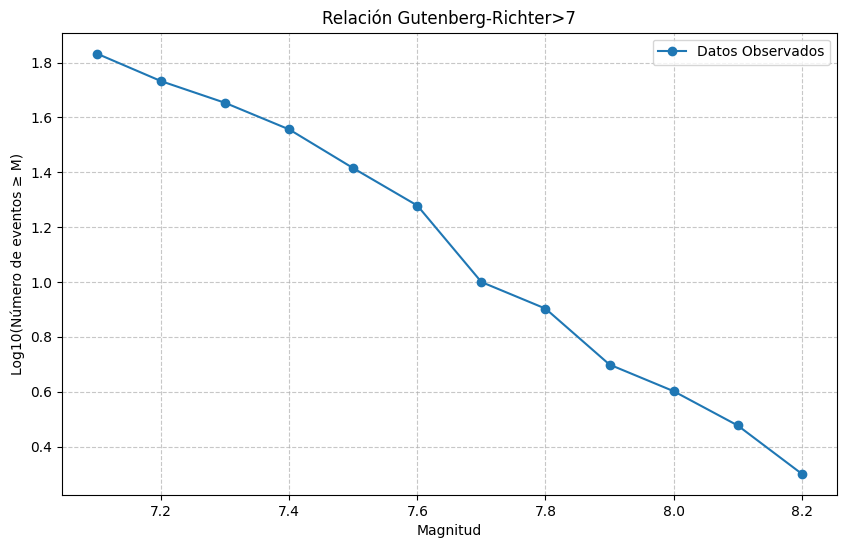

In [ ]:
#Gutenberg-Richter > 7
# Calcular el número acumulativo de sismos


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos

# Ordenar por magnitud
magnitudes_7 = sorted(sismos7["Magnitud"].unique())
n_eventos_7 = [sum(sismos7["Magnitud"] >= mag) for mag in magnitudes_7]

# Gráfica Gutenberg-Richter
plt.figure(figsize=(10, 6))
plt.plot(magnitudes_7, np.log10(n_eventos_7), marker='o', linestyle='-', label="Datos Observados")
plt.title("Relación Gutenberg-Richter>7")
plt.xlabel("Magnitud")
plt.ylabel("Log10(Número de eventos ≥ M)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


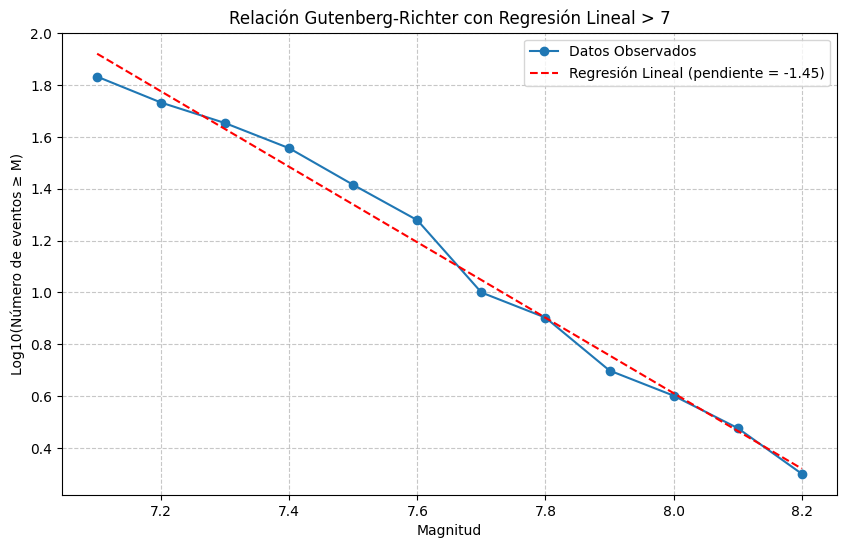

(-1.4546452607193021,
 12.248904233588913,
 -0.9943171174158153,
 4.623555891583146e-11,
 0.04925083867409102)

In [ ]:
from scipy.stats import linregress

# Calcular log10 del número de eventos
log_n_eventos_7 = np.log10(n_eventos_7)

# Ajustar una regresión lineal por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(magnitudes_7, log_n_eventos_7)

# Crear los valores ajustados
line_fit = slope * np.array(magnitudes_7) + intercept

# Gráfica Gutenberg-Richter con la regresión lineal
plt.figure(figsize=(10, 6))
plt.plot(magnitudes_7, log_n_eventos_7, marker='o', linestyle='-', label="Datos Observados")
plt.plot(magnitudes_7, line_fit, color='red', linestyle='--', label=f"Regresión Lineal (pendiente = {slope:.2f})")
plt.title("Relación Gutenberg-Richter con Regresión Lineal > 7")
plt.xlabel("Magnitud")
plt.ylabel("Log10(Número de eventos ≥ M)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Mostrar detalles de la regresión
slope, intercept, r_value, p_value, std_err


In [ ]:
#organiza valores para sismos > 6
sismos6['fecha_hora_6'] = pd.to_datetime(sismos6['Fecha UTC_6'] + ' ' + sismos6['Hora UTC_6'])

# Calcula los tiempos de interllegada
sismos6['tiempo_interllegada_6'] = sismos6['fecha_hora_6'].diff()

# Convierte los tiempos de interllegada a días
sismos6['tiempo_interllegada_dias_6'] = sismos6['tiempo_interllegada_6'].dt.total_seconds() / (24 * 3600)

# Acumula los tiempos de interllegada
sismos6['tiempo_acumulado_6'] = sismos6['tiempo_interllegada_dias_6'].cumsum()

print(sismos6[['fecha_hora_6', 'tiempo_interllegada_dias_6']])

           fecha_hora_6  tiempo_interllegada_dias_6
0   1900-01-20 06:33:30                         NaN
1   1900-05-16 20:12:00                  116.568403
2   1901-03-05 10:45:00                  292.606250
3   1901-12-09 02:17:00                  278.647222
4   1902-01-16 23:19:00                   38.876389
..                  ...                         ...
280 2022-11-04 10:02:48                   43.157407
281 2022-11-22 16:39:05                   18.275197
282 2023-06-18 20:30:22                  208.160613
283 2023-07-14 09:29:01                   25.540729
284 2024-05-12 11:39:11                  303.090394

[285 rows x 2 columns]


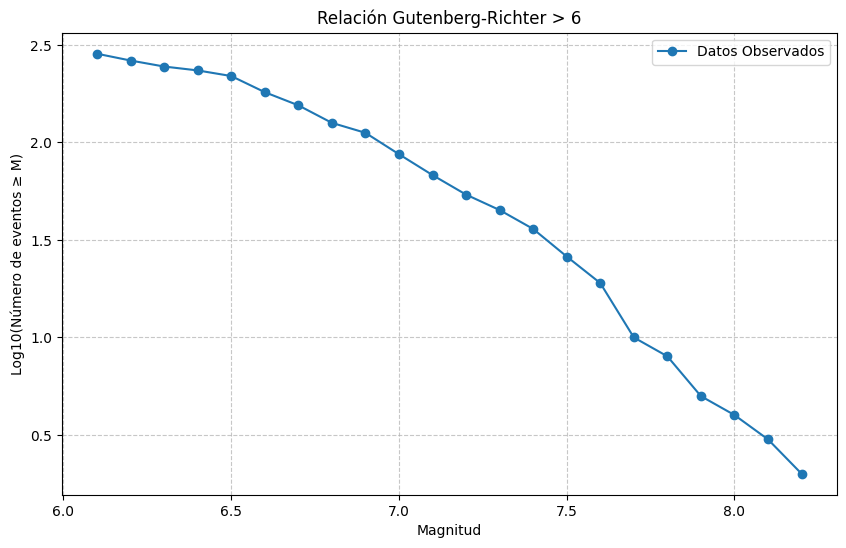

In [ ]:
#Gutenberg-Richter > 6
# Calcular el número acumulativo de sismos

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos

# Ordenar por magnitud
magnitudes_6= sorted(sismos6["Magnitud_6"].unique())
n_eventos_6 = [sum(sismos6["Magnitud_6"] >= mag) for mag in magnitudes_6]

# Gráfica Gutenberg-Richter
plt.figure(figsize=(10, 6))
plt.plot(magnitudes_6, np.log10(n_eventos_6), marker='o', linestyle='-', label="Datos Observados")
plt.title("Relación Gutenberg-Richter > 6")
plt.xlabel("Magnitud")
plt.ylabel("Log10(Número de eventos ≥ M)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


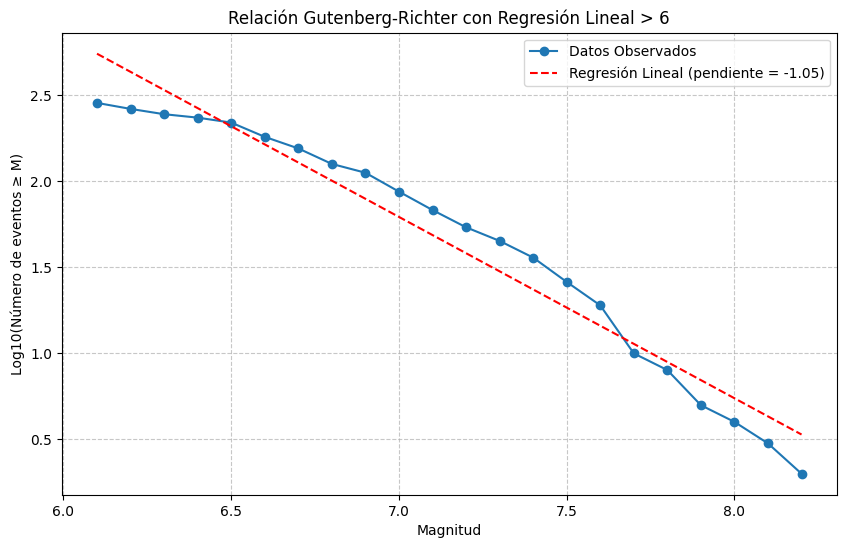

(-1.0532135693399192,
 9.1650752311256,
 -0.9763870560670173,
 8.823409296189733e-15,
 0.052106332089337876)

In [ ]:
from scipy.stats import linregress

# Calcular log10 del número de eventos
log_n_eventos_6 = np.log10(n_eventos_6)

# Ajustar una regresión lineal por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(magnitudes_6, log_n_eventos_6)

# Crear los valores ajustados
line_fit = slope * np.array(magnitudes_6) + intercept

# Gráfica Gutenberg-Richter con la regresión lineal
plt.figure(figsize=(10, 6))
plt.plot(magnitudes_6, log_n_eventos_6, marker='o', linestyle='-', label="Datos Observados")
plt.plot(magnitudes_6, line_fit, color='red', linestyle='--', label=f"Regresión Lineal (pendiente = {slope:.2f})")
plt.title("Relación Gutenberg-Richter con Regresión Lineal > 6")
plt.xlabel("Magnitud")
plt.ylabel("Log10(Número de eventos ≥ M)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Mostrar detalles de la regresión
slope, intercept, r_value, p_value, std_err


In [ ]:
#ordena de mayor a menor sismos > 7
tiempo_7=sismos7.sort_values(by='tiempo_interllegada_dias', ascending=False)

In [ ]:
#ordena de mayor a menor sismos > 6
tiempo_6=sismos6.sort_values(by='tiempo_interllegada_dias_6', ascending=False)

In [ ]:
#  > 7
#elige solo la columna de tiempo_interllegada_dias
tiempo_interllegada_7= tiempo_7['tiempo_interllegada_dias']
print(tiempo_interllegada_7)

50    2911.733137
58    2629.857037
16    2602.829699
34    2417.766898
32    2308.343356
         ...     
22      14.982847
63      11.559282
53      11.460463
49       1.513484
0             NaN
Name: tiempo_interllegada_dias, Length: 68, dtype: float64


In [ ]:
#  > 6
#elige solo la columna de tiempo_interllegada_dias
tiempo_interllegada_6 = tiempo_6['tiempo_interllegada_dias_6']
print(tiempo_interllegada_6)

43     1152.125046
9      1014.661389
123     935.900706
180     804.503229
53      792.233426
          ...     
15        0.195833
161       0.171609
93        0.001644
127       0.001285
0              NaN
Name: tiempo_interllegada_dias_6, Length: 285, dtype: float64


In [ ]:
# > 7
#cambia de serie a lista
tiempo_interllegada_lista_7 = tiempo_interllegada_7.tolist()
print(tiempo_interllegada_lista_7)

[2911.7331365740743, 2629.857037037037, 2602.829699074074, 2417.7668981481484, 2308.3433564814814, 1977.2930092592592, 1748.2304050925925, 1238.5985648148148, 1209.3995486111112, 1188.288773148148, 1074.7642939814814, 1068.152361111111, 1029.4521296296296, 1007.291412037037, 991.8352662037037, 926.3566550925926, 889.9660300925926, 877.6379976851852, 857.6593055555555, 834.2270833333333, 827.9510648148148, 819.8260416666667, 786.715462962963, 733.7858333333334, 715.8070138888888, 677.0075, 634.9964930555556, 590.1571875, 589.2374537037037, 526.910775462963, 526.0274305555556, 505.36541666666665, 491.9431597222222, 490.49194444444447, 478.1855092592593, 441.42966435185184, 413.51653935185186, 376.6787384259259, 369.368125, 365.5199074074074, 348.1385648148148, 331.6063657407407, 321.72230324074076, 237.12480324074073, 231.9396064814815, 209.53436342592593, 199.4053935185185, 192.3413888888889, 184.3675, 162.33763888888888, 157.74652777777777, 150.39635416666667, 150.22569444444446, 127.0

In [ ]:
# > 6
#cambia de serie a lista
tiempo_interllegada_lista_6 = tiempo_interllegada_6.tolist()
print(tiempo_interllegada_lista_6)

[1152.1250462962962, 1014.6613888888888, 935.9007060185185, 804.5032291666666, 792.2334259259259, 791.6006365740741, 665.4427430555555, 664.2566203703703, 649.4670601851852, 605.1670833333334, 589.2374537037037, 573.2560185185185, 568.4015740740741, 547.9862962962962, 547.6921759259259, 544.525625, 526.0274305555556, 517.9896064814815, 505.36541666666665, 493.29956018518516, 475.67284722222223, 441.42966435185184, 430.6196296296296, 425.61076388888887, 416.3653703703704, 415.1018287037037, 413.51653935185186, 403.68398148148145, 385.99983796296294, 371.85935185185184, 369.368125, 364.21488425925924, 362.47342592592594, 349.6906597222222, 341.1490856481482, 338.7783449074074, 334.95306712962963, 322.3322337962963, 313.9763541666667, 305.2883449074074, 303.0903935185185, 295.55443287037036, 292.60625, 291.50895833333334, 291.2972800925926, 290.92952546296294, 290.469537037037, 290.342962962963, 290.2402083333333, 278.64722222222224, 276.1765972222222, 266.26526620370373, 265.358599537037

In [ ]:
# > 7
#Genera lista de interllegado(eje x)
interllegada_lista_7 = []
for iterllegadas_7 in tiempo_interllegada_lista_7[:-1]:
  interllegada_lista_7.append(iterllegadas_7)

#interllegadas sin NaN
print(interllegada_lista_7)

[2911.7331365740743, 2629.857037037037, 2602.829699074074, 2417.7668981481484, 2308.3433564814814, 1977.2930092592592, 1748.2304050925925, 1238.5985648148148, 1209.3995486111112, 1188.288773148148, 1074.7642939814814, 1068.152361111111, 1029.4521296296296, 1007.291412037037, 991.8352662037037, 926.3566550925926, 889.9660300925926, 877.6379976851852, 857.6593055555555, 834.2270833333333, 827.9510648148148, 819.8260416666667, 786.715462962963, 733.7858333333334, 715.8070138888888, 677.0075, 634.9964930555556, 590.1571875, 589.2374537037037, 526.910775462963, 526.0274305555556, 505.36541666666665, 491.9431597222222, 490.49194444444447, 478.1855092592593, 441.42966435185184, 413.51653935185186, 376.6787384259259, 369.368125, 365.5199074074074, 348.1385648148148, 331.6063657407407, 321.72230324074076, 237.12480324074073, 231.9396064814815, 209.53436342592593, 199.4053935185185, 192.3413888888889, 184.3675, 162.33763888888888, 157.74652777777777, 150.39635416666667, 150.22569444444446, 127.0

In [ ]:
# > 6
#Genera lista de interllegado(eje x)
interllegada_lista_6 = []
for iterllegadas_6 in tiempo_interllegada_lista_6[:-1]:
  interllegada_lista_6.append(iterllegadas_6)

#interllegadas sin NaN
print(interllegada_lista_6)

[1152.1250462962962, 1014.6613888888888, 935.9007060185185, 804.5032291666666, 792.2334259259259, 791.6006365740741, 665.4427430555555, 664.2566203703703, 649.4670601851852, 605.1670833333334, 589.2374537037037, 573.2560185185185, 568.4015740740741, 547.9862962962962, 547.6921759259259, 544.525625, 526.0274305555556, 517.9896064814815, 505.36541666666665, 493.29956018518516, 475.67284722222223, 441.42966435185184, 430.6196296296296, 425.61076388888887, 416.3653703703704, 415.1018287037037, 413.51653935185186, 403.68398148148145, 385.99983796296294, 371.85935185185184, 369.368125, 364.21488425925924, 362.47342592592594, 349.6906597222222, 341.1490856481482, 338.7783449074074, 334.95306712962963, 322.3322337962963, 313.9763541666667, 305.2883449074074, 303.0903935185185, 295.55443287037036, 292.60625, 291.50895833333334, 291.2972800925926, 290.92952546296294, 290.469537037037, 290.342962962963, 290.2402083333333, 278.64722222222224, 276.1765972222222, 266.26526620370373, 265.358599537037

In [ ]:
#>7
n_7 = len(interllegada_lista_7) # n=numero de interllegadas

estimador_insesgado_7 = np.linspace(1/(n_7+1), n_7/(n_7+1), n_7)
print(estimador_insesgado_7)

[0.01470588 0.02941176 0.04411765 0.05882353 0.07352941 0.08823529
 0.10294118 0.11764706 0.13235294 0.14705882 0.16176471 0.17647059
 0.19117647 0.20588235 0.22058824 0.23529412 0.25       0.26470588
 0.27941176 0.29411765 0.30882353 0.32352941 0.33823529 0.35294118
 0.36764706 0.38235294 0.39705882 0.41176471 0.42647059 0.44117647
 0.45588235 0.47058824 0.48529412 0.5        0.51470588 0.52941176
 0.54411765 0.55882353 0.57352941 0.58823529 0.60294118 0.61764706
 0.63235294 0.64705882 0.66176471 0.67647059 0.69117647 0.70588235
 0.72058824 0.73529412 0.75       0.76470588 0.77941176 0.79411765
 0.80882353 0.82352941 0.83823529 0.85294118 0.86764706 0.88235294
 0.89705882 0.91176471 0.92647059 0.94117647 0.95588235 0.97058824
 0.98529412]


In [ ]:
#>6
n_6 = len(interllegada_lista_6) # n=numero de interllegafdas

estimador_insesgado_6 = np.linspace(1/(n_6+1), n_6/(n_6+1), n_6)
print(estimador_insesgado_6)

[0.00350877 0.00701754 0.01052632 0.01403509 0.01754386 0.02105263
 0.0245614  0.02807018 0.03157895 0.03508772 0.03859649 0.04210526
 0.04561404 0.04912281 0.05263158 0.05614035 0.05964912 0.06315789
 0.06666667 0.07017544 0.07368421 0.07719298 0.08070175 0.08421053
 0.0877193  0.09122807 0.09473684 0.09824561 0.10175439 0.10526316
 0.10877193 0.1122807  0.11578947 0.11929825 0.12280702 0.12631579
 0.12982456 0.13333333 0.13684211 0.14035088 0.14385965 0.14736842
 0.15087719 0.15438596 0.15789474 0.16140351 0.16491228 0.16842105
 0.17192982 0.1754386  0.17894737 0.18245614 0.18596491 0.18947368
 0.19298246 0.19649123 0.2        0.20350877 0.20701754 0.21052632
 0.21403509 0.21754386 0.22105263 0.2245614  0.22807018 0.23157895
 0.23508772 0.23859649 0.24210526 0.24561404 0.24912281 0.25263158
 0.25614035 0.25964912 0.26315789 0.26666667 0.27017544 0.27368421
 0.27719298 0.28070175 0.28421053 0.2877193  0.29122807 0.29473684
 0.29824561 0.30175439 0.30526316 0.30877193 0.3122807  0.3157

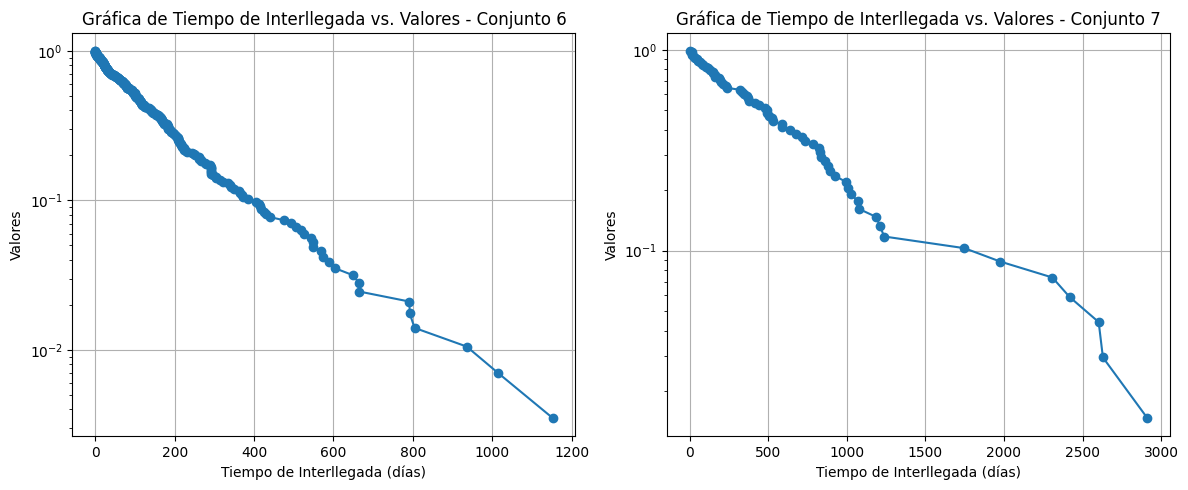

In [ ]:
# Crea una figura y subgráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Dos subgráficas en una fila

# Gráfica para el conjunto de datos 6
ax1.semilogy(interllegada_lista_6, estimador_insesgado_6, marker='o', linestyle='-')
ax1.set_xlabel('Tiempo de Interllegada (días)')
ax1.set_ylabel('Valores')
ax1.set_title('Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 6')
ax1.grid(True)

# Gráfica para el conjunto de datos 7
ax2.semilogy(interllegada_lista_7, estimador_insesgado_7, marker='o', linestyle='-')
ax2.set_xlabel('Tiempo de Interllegada (días)')
ax2.set_ylabel('Valores')
ax2.set_title('Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 7')
ax2.grid(True)

# Ajusta el espacio entre las subgráficas
plt.tight_layout()
plt.show()

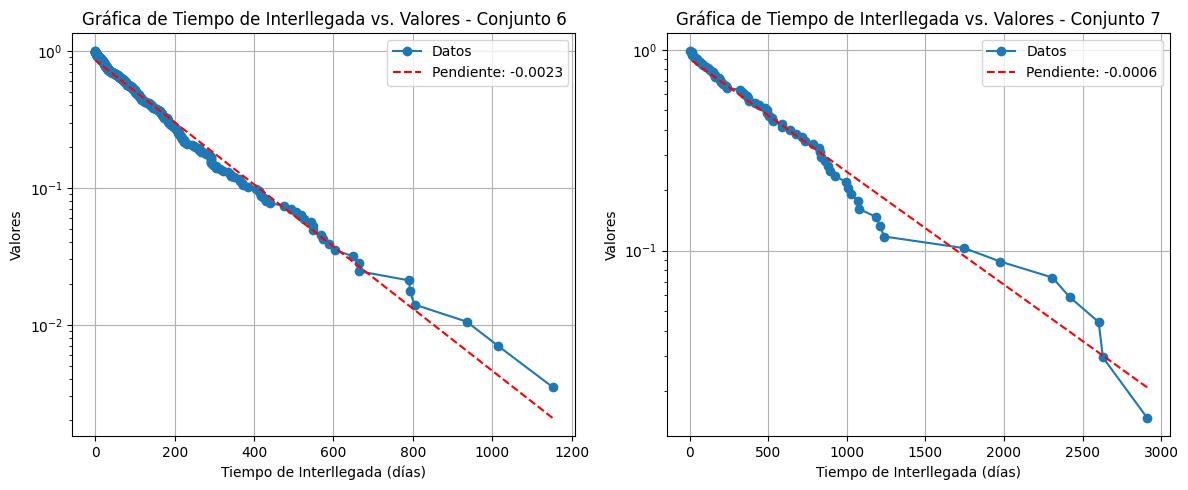

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Función para calcular y graficar la pendiente en una gráfica semilog
def plot_with_slope(ax, x_data, y_data, title):
    # Ajuste de regresión lineal en la escala logarítmica de y
    slope, intercept, _, _, _ = linregress(x_data, np.log10(y_data))

    # Genera la línea de tendencia usando la pendiente calculada
    trend_line = 10**(intercept + slope * np.array(x_data))

    # Grafica los datos
    ax.semilogy(x_data, y_data, marker='o', linestyle='-', label='Datos')
    ax.semilogy(x_data, trend_line, 'r--', label=f'Pendiente: {slope:.4f}')
    ax.set_xlabel('Tiempo de Interllegada (días)')
    ax.set_ylabel('Valores')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)


# Crea una figura y subgráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica con la pendiente para el conjunto de datos 6
plot_with_slope(ax1, interllegada_lista_6, estimador_insesgado_6, 'Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 6')

# Gráfica con la pendiente para el conjunto de datos 7
plot_with_slope(ax2, interllegada_lista_7, estimador_insesgado_7, 'Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 7')

# Ajusta el espacio entre las subgráficas
plt.tight_layout()
plt.show()

Calculamos el inverso de las pendientes lambda_6=434.78 dias y lambda_7=1666.66 dias, lo que nos da la recurrencia sísmica de magnitud mayor o igual a 6 y 7, respectivamente.

Es decir, cada 434.78 dias hay probabilidad de que suceda un temblor >6 y cada 1666.66 dias hay probabilidad de que suceda un temblor >7

Para establecer la relacion con la Ley de Gutenberg richter: Log10(N)=a+b*M




In [ ]:
# Ejemplo de parámetros
a, b = 4.5, 1.0  # Parámetros Gutenberg-Richter
T_values = [50, 100, 500, 1000]  # Tiempos de exposición
M = np.linspace(5, 8, 50)  # Rango de magnitudes

# Generar curvas de peligro
plt.figure()
for T in T_values:
    lambda_M = 10**(a - b * M)
    P = 1 - np.exp(-lambda_M * T)
    plt.plot(M, P, label=f"T = {T} años")

plt.xlabel("Magnitud, M")
plt.ylabel("Probabilidad de Excedencia")
plt.title("Curvas de Peligro Sísmico")
plt.legend()
plt.grid()
plt.show()